# Coffee Shop Daily Revenue Prediction

In [1]:
# importing required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

**Data Exploration**

In [2]:
# loading the dataframe
df = pd.read_csv("Coffee Sales Project/coffee_shop_revenue.csv")

In [3]:
# quick overview of data 
df.head(5)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [5]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [6]:
df.shape

(2000, 7)

* Number of Customers Per Day: Total daily customer visits to the coffee shop (50 - 500)
* Average Order Value: Average amount spent per customer per visit (2.50 - 10.00),000).

* Operating Hours Per Day: Total hours the coffee shop operates each day (6 - 18 hours)
* Number of Employees: Number of employees working on a given day (2 - 15)

* Marketing Spend Per Day: Daily expenditure on marketing and promotions (10 - 500)
* Location Foot Traffic (people/hour): Number of people passing by the shop per hour (50 - 1000)

* Daily Revenue [Target Variable]: Total revenue generated per day (200 - 10,000).

**Data Cleaning and Preprocessing**

In [7]:
# checking null values
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [8]:
# checkinig duplicate values
df.duplicated().sum()

0

**Exploratory Data Analysis (EDA)**

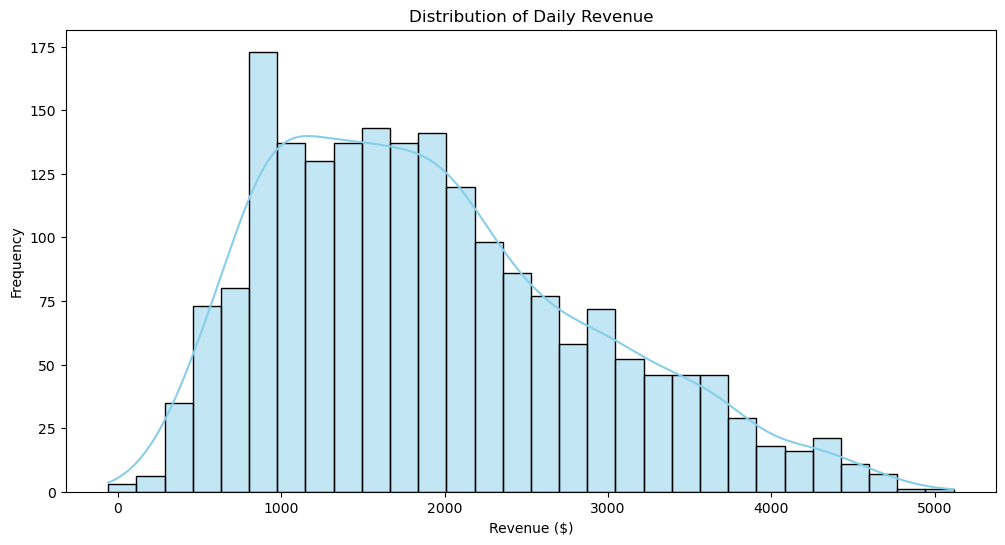

In [9]:
# Plot daily revenue over time to see patterns
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Revenue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Daily Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.show()

* The distribution is not perfectly normal but skewed to the right.
* Most of the daily revenues are between 500 and 3000, peaking around 1000 to 1500.
* A few days have very high revenue (~5000), which might indicate special events, promotions, or peak seasons. (outliers).
* As revenue increases beyond 3000, the frequency of occurrence decreases.

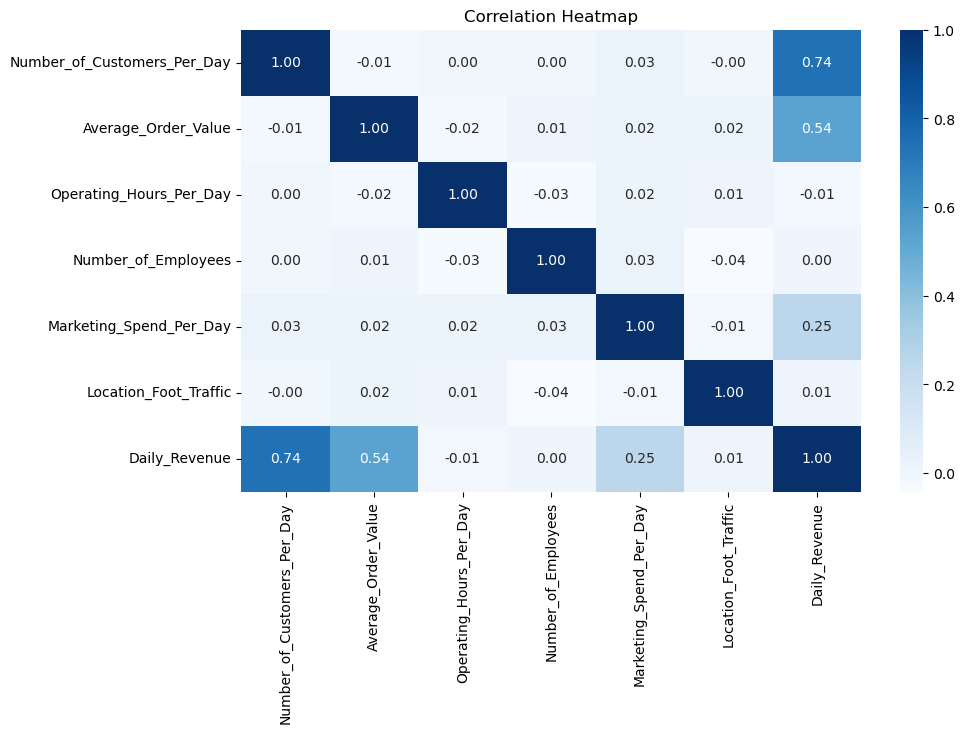

In [10]:
# Find relationships between numerical variables.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* Key Revenue Drivers – The number of customers per day (0.74) and average order value (0.54) have the highest positive correlations with daily revenue.
* Low Impact Factors – Operating hours, number of employees, and location foot traffic show minimal correlation with revenue, suggesting they don't directly influence sales.
* Marketing Influence – Marketing spend has a weak correlation (0.25) with revenue, indicating its effectiveness may depend on other factors like timing and campaign quality.

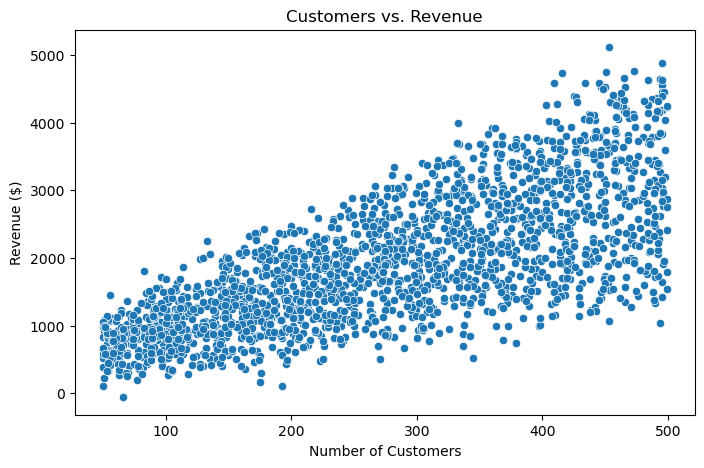

In [11]:
# Customers vs. Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Number_of_Customers_Per_Day"], y=df["Daily_Revenue"])
plt.title("Customers vs. Revenue")
plt.xlabel("Number of Customers")
plt.ylabel("Revenue ($)")
plt.show()

* Positive Correlation – More customers lead to higher revenue, showing a strong relationship.
* Revenue Variability – Revenue fluctuates at higher customer counts, likely due to spending differences.
* Outliers & Insights – Some days deviate from the trend, requiring analysis of promotions, pricing, or operations.

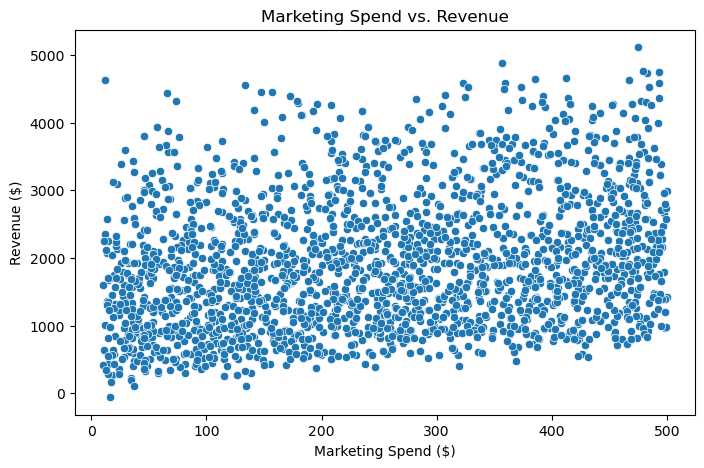

In [12]:
# Marketing Spend vs. Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Marketing_Spend_Per_Day"], y=df["Daily_Revenue"])
plt.title("Marketing Spend vs. Revenue")
plt.xlabel("Marketing Spend ($)")
plt.ylabel("Revenue ($)")
plt.show()

* Positive trend but high variance: Revenue generally increases with marketing spend, but data points are widely scattered, meaning higher spend doesn’t always guarantee higher revenue.
* Diminishing returns: Beyond 300 in marketing spend, revenue growth appears inconsistent, suggesting that additional spending may not always yield proportional revenue gains.
* High-revenue outliers: Some points show revenue exceeding 4000 even with lower marketing spend (~100-200), indicating that factors beyond marketing influence revenue.

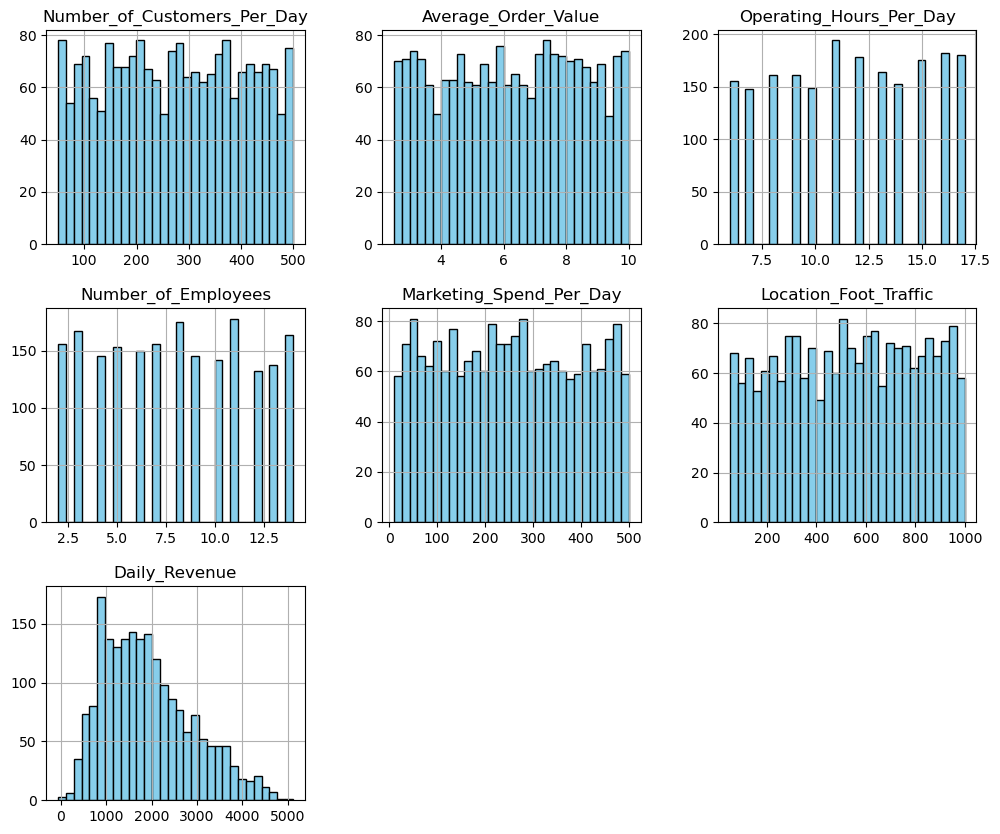

In [13]:
# Check how features are distributed to identify patterns.
df.hist(figsize=(12, 10), bins=30,color='skyblue', edgecolor="black")
plt.show()

* Number of Customers Per Day: The distribution is relatively uniform, with most days seeing between 100 to 500 customers, indicating steady foot traffic.
* Average Order Value: Most orders fall between 4 to 10, suggesting a consistent spending pattern among customers.
* Operating Hours Per Day: The business operates mostly between 7 to 17 hours, with little variation, meaning extended hours may not significantly impact revenue.
* Number of Employees: Employee count ranges from 3 to 13, with frequent peaks, suggesting optimized staffing based on demand.
* Marketing Spend Per Day: Spending is spread across 0 to 500, but there’s a slight concentration towards higher spending, indicating aggressive marketing.
* Location Foot Traffic: The foot traffic varies between 200 to 1000, showing a wide range of customer influx depending on external factors.
* Daily Revenue: Revenue is right-skewed, with most values between 500 to 3000, meaning occasional high-earning days significantly impact overall revenue.

#### 💡 Next step: Moving towards predictive modeling for revenue forecasting! 📊

**Data Preprocessing**

In [14]:
# Since revenue is right-skewed, use the IQR method to remove extreme outliers:
Q1 = df['Daily_Revenue'].quantile(0.25)
Q3 = df['Daily_Revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Daily_Revenue'] >= lower_bound) & (df['Daily_Revenue'] <= upper_bound)]

**Feature Selection (Choosing the Right Inputs for the Model)**
* **Based on EDA:**
* *Number of Customers Per Day (Strongest Correlation: 0.74)*
* *Average Order Value (0.54 correlation)*
* *Marketing Spend (0.25 correlation,Weak, but might contribute)*

In [15]:
X = df[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Marketing_Spend_Per_Day']]
y = df['Daily_Revenue']

In [16]:
X.head(5)

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day
0,152,6.74,106.62
1,485,4.50,57.83
2,398,9.09,91.76
3,320,8.48,462.63
4,156,7.44,412.52


In [17]:
y.head(5)

0    1547.81
1    2084.68
2    3118.39
3    2912.20
4    1663.42
Name: Daily_Revenue, dtype: float64

**Train-Test Split & Model Training**

In [18]:
#Train-Test Split
# importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of new datasets
print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data:", X_test.shape, y_test.shape)

Training Data: (1592, 3) (1592,)
Testing Data: (399, 3) (399,)


In [19]:
# linear regression: revenue continuous numeric valueabsfrom sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
# Initialize Model
model = LinearRegression()

# Train Model
model.fit(X_train, y_train)

# Make Predictions on Test Data
y_pred = model.predict(X_test)

In [20]:
# Check Model Accuracy (R² Score & RMSE)
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.90
RMSE: 309.28


In [21]:
mean = df['Daily_Revenue'].mean() #checking the mean
mean

1904.4886539427423

**Checking RMSE Accuracy with Mean Revenue**

In [22]:
Percentage_Error = (rmse/mean) *100
print(f'Percentage Error:{Percentage_Error:.2f}%')

Percentage Error:16.24%


**Check Feature Importance**

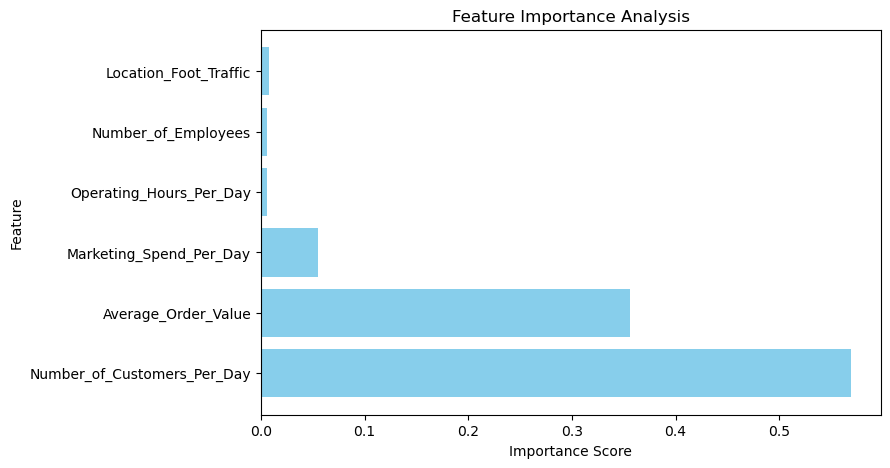

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Load data
X = df[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Marketing_Spend_Per_Day', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Location_Foot_Traffic']]
y = df['Daily_Revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor (better for feature importance analysis)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(X.columns, importance, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

In [24]:
pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})

,Feature,Importance
0,Number_of_Customers_Per_Day,0.569522
1,Average_Order_Value,0.356280
2,Marketing_Spend_Per_Day,0.054862
3,Operating_Hours_Per_Day,0.005623
4,Number_of_Employees,0.005613
5,Location_Foot_Traffic,0.008100


In [25]:
# Implement Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Keep only the most important features
X_selected = df[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Marketing_Spend_Per_Day']]
y = df['Daily_Revenue']
# Define hyperparameters to tune
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Train Ridge Regression with cross-validation
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

# Best model
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate Performance
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

In [26]:
print(f"Best Alpha: {ridge_cv.best_params_['alpha']}")
print(f"R² Score (Ridge): {r2_ridge:.2f}")
print(f"RMSE (Ridge): {rmse_ridge:.2f}")

Best Alpha: 0.01
R² Score (Ridge): 0.90
RMSE (Ridge): 309.15


**Checking RMSE Accuracy with Mean Revenue**

In [27]:
Percentage_Error = (rmse_ridge/mean) *100
print(f'Percentage Error:{Percentage_Error:.2f}%')

Percentage Error:16.23%


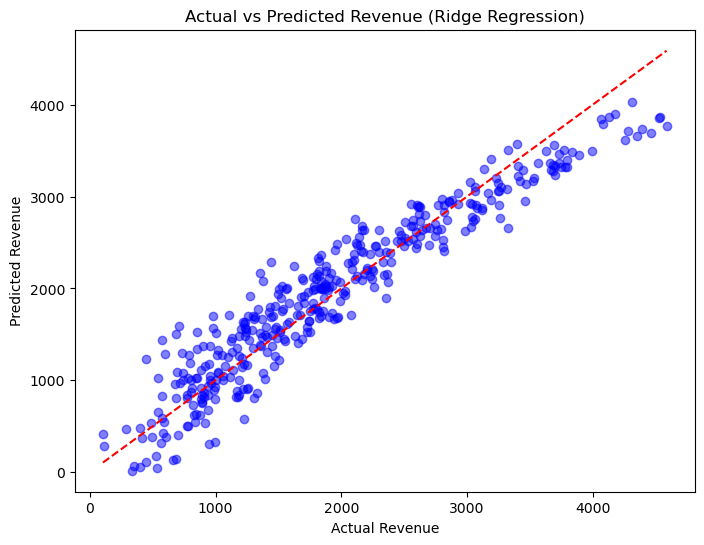

In [28]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (Ridge Regression)")
plt.show()

**Feature Engineering for Better Predictions**

In [29]:
# Create new features
df['Revenue_Per_Customer'] = df['Daily_Revenue'] / df['Number_of_Customers_Per_Day']
df['Marketing_Efficiency'] = df['Daily_Revenue'] / df['Marketing_Spend_Per_Day']
df['Operating_Revenue_Per_Hour'] = df['Daily_Revenue'] / df['Operating_Hours_Per_Day']
df['Employee_Efficiency'] = df['Daily_Revenue'] / df['Number_of_Employees']

In [30]:
df.head(5)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Per_Customer,Marketing_Efficiency,Operating_Revenue_Per_Hour,Employee_Efficiency
0,152,6.74,14,4,106.62,97,1547.81,10.182961,14.517070,110.557857,386.952500
1,485,4.50,12,8,57.83,744,2084.68,4.298309,36.048418,173.723333,260.585000
2,398,9.09,6,6,91.76,636,3118.39,7.835151,33.984198,519.731667,519.731667
3,320,8.48,17,4,462.63,770,2912.20,9.100625,6.294879,171.305882,728.050000
4,156,7.44,17,2,412.52,232,1663.42,10.662949,4.032338,97.848235,831.710000


**Check Feature Importance**

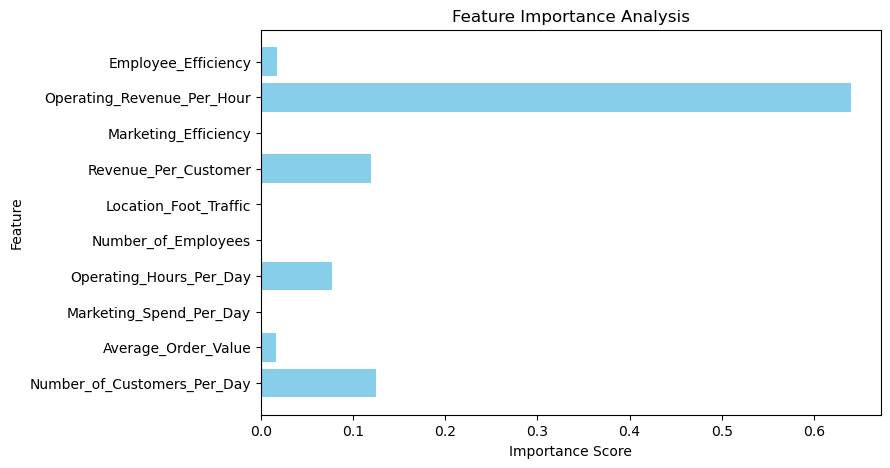

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Load data
X = df[['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Marketing_Spend_Per_Day', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Location_Foot_Traffic',
       'Revenue_Per_Customer', 'Marketing_Efficiency', 'Operating_Revenue_Per_Hour', 'Employee_Efficiency']]
y = df['Daily_Revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor (better for feature importance analysis)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(X.columns, importance, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

In [32]:
pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})

,Feature,Importance
0,Number_of_Customers_Per_Day,0.124890
1,Average_Order_Value,0.016328
2,Marketing_Spend_Per_Day,0.001051
3,Operating_Hours_Per_Day,0.077004
4,Number_of_Employees,0.001249
5,Location_Foot_Traffic,0.000791
6,Revenue_Per_Customer,0.119677
7,Marketing_Efficiency,0.000976
8,Operating_Revenue_Per_Hour,0.640533
9,Employee_Efficiency,0.017501


In [33]:
# Select updated features
selected_features = ['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Marketing_Spend_Per_Day',
                     'Revenue_Per_Customer', 'Marketing_Efficiency', 'Operating_Revenue_Per_Hour', 'Employee_Efficiency']

# Updated training data
X_new = df[selected_features]
y_new = df['Daily_Revenue']

# Split data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train Ridge Regression again
ridge_new = Ridge(alpha=0.01)
ridge_new.fit(X_train_new, y_train_new)

# Predict on test set
y_pred_new = ridge_new.predict(X_test_new)

# Evaluate new model
r2_ridge_new = r2_score(y_test_new, y_pred_new)
rmse_ridge_new = np.sqrt(mean_squared_error(y_test_new, y_pred_new))

print(f"Updated R² Score (Ridge): {r2_ridge_new:.4f}")
print(f"Updated RMSE (Ridge): {rmse_ridge_new:.2f}")

Updated R² Score (Ridge): 0.9294
Updated RMSE (Ridge): 262.20


In [34]:
# Predict on training data using the trained Ridge model
y_train_pred_ridge = ridge_new.predict(X_train_new)

# Calculate R² and RMSE for training data
r2_ridge_train = r2_score(y_train_new, y_train_pred_ridge)
rmse_ridge_train = np.sqrt(mean_squared_error(y_train_new, y_train_pred_ridge))

print(f"Ridge R² Score (Train Data): {r2_ridge_train:.4f}")
print(f"Ridge RMSE (Train Data): {rmse_ridge_train:.2f}")

Ridge R² Score (Train Data): 0.9234
Ridge RMSE (Train Data): 263.59


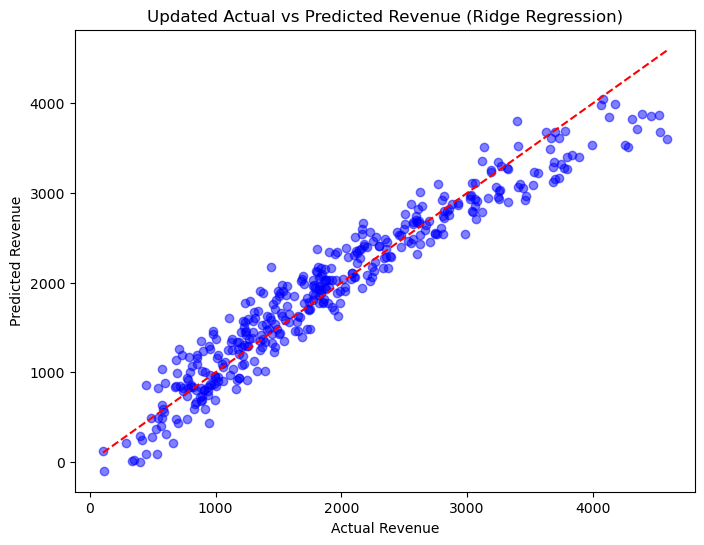

In [35]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_new, y_pred_new, color='blue', alpha=0.5)
plt.plot([min(y_test_new), max(y_test_new)], [min(y_test_new), max(y_test_new)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Updated Actual vs Predicted Revenue (Ridge Regression)")
plt.show()

**Checking RMSE Accuracy with Mean Revenue**

In [36]:
Percentage_Error = (rmse_ridge_new/mean) *100
print(f"Percentage Error:{Percentage_Error:.2f}%")

Percentage Error:13.77%


**Saving the model**

In [37]:
import joblib

# Save the trained Ridge model
joblib.dump(ridge_new, "ridge_regression_model.pkl")

['ridge_regression_model.pkl']

**Checking with an example**

In [38]:
# Load the updated model
loaded_model = joblib.load("ridge_regression_model.pkl")

# Example new data
new_data = pd.DataFrame({
    "Number_of_Customers_Per_Day": [550],
    "Average_Order_Value": [22],
    "Marketing_Spend_Per_Day": [150],
    "Operating_Hours_Per_Day": [12],
    "Number_of_Employees": [5],
    "Location_Foot_Traffic": [300],
    "Revenue_Per_Customer": [12.5],  
    "Marketing_Efficiency": [0.8],  
    "Operating_Revenue_Per_Hour": [200],  
    "Employee_Efficiency": [40]
})

# Ensure the new data has the same feature order
new_data = new_data[selected_features]

# Predict revenue
predicted_revenue = loaded_model.predict(new_data)
print("Predicted Revenue:", predicted_revenue[0])

Predicted Revenue: 5651.173124206319


In [39]:
df.to_csv('Coffee Sales Project.csv')

$$Thank$$$$You$$